In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Archit Verma\OneDrive\Desktop\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df1=df


In [4]:
df1['director']=df1['director'].fillna('Unknown')
df1['cast']=df1['cast'].fillna('Unknown')
df1['country']=df1['country'].fillna('Unknown')
df1.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [5]:
df1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
valid_cat=['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR']
df1['rating']=df1['rating'].apply(lambda x: x if x in valid_cat else None)
df1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', None,
       'TV-Y7-FV', 'UR'], dtype=object)

In [9]:
df2=df1

In [10]:
mode_value=df1[df1['rating'].notna()]['rating'].mode()[0]
df1['rating']=df1['rating'].fillna(mode_value)
df1['rating'].isna().sum()

np.int64(0)

In [11]:
df2=df1

In [12]:
df1['month']=df1['date_added'].str.split(' ').str[0]
df1['date']=df1['date_added'].str.split(' ').str[1]
df1['year']=df1['date_added'].str.split(',').str[1]

df1['date']=df1['date'].apply(lambda x:x.replace(',','') if isinstance(x,str) else x)
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021


In [13]:
df2=df1

In [14]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df1['month']=df1['month'].map(month_map)
df1['date']=df1['date'].apply(lambda x:'0' if any(month in str(x) for month in month_map) else x)

df1['date']=pd.to_numeric(df1['date'],errors='coerce').fillna(0).astype(int)
df1['year']=pd.to_numeric(df1['year'],errors='coerce').fillna(0).astype(int)

df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021


In [15]:
df2=df1

In [16]:
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020


In [17]:
df1['month']=df1['month'].fillna(0)

In [18]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020


In [19]:
df1.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
month            0
date             0
year             0
dtype: int64

In [20]:
df1.drop('date_added',axis=1,inplace=True)

In [22]:
df2=df1 #flag

In [24]:
df1[df1['duration'].isnull()]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4.0,4,2017
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9.0,16,2016
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,8.0,15,2016


In [25]:
df1.loc[5541, 'duration'] = '74 min'
df1.loc[5794, 'duration'] = '84 min'
df1.loc[5813, 'duration'] = '66 min'

In [27]:
df2=df1 #flag2

In [29]:
df1['movie_duration']=df1['duration'].apply(lambda x:x if 'min' in str(x) else np.nan)
df1['season_duration']=df1['duration'].apply(lambda x:x if 'Season' in str(x) else np.nan)
df1.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90 min,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,NaN,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021,NaN,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021,NaN,1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021,NaN,2 Seasons


In [30]:
df1['movie_duration']=(df1['movie_duration'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int))

In [31]:
df1

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021,0,1 Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021,0,1 Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021,0,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019,158,NaN
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019,0,2 Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019,88,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020,88,NaN


In [32]:
df2=df1

In [33]:
df1['season_duration']=(df1['season_duration'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int))

In [35]:
df1.isnull().sum() 

show_id            0
type               0
title              0
director           0
cast               0
country            0
release_year       0
rating             0
duration           0
listed_in          0
description        0
month              0
date               0
year               0
movie_duration     0
season_duration    0
dtype: int64

In [36]:
df1

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021,0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019,158,0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019,0,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019,88,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020,88,0


In [38]:
df2=df1 #flag, cleaned!

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          8807 non-null   object 
 1   type             8807 non-null   object 
 2   title            8807 non-null   object 
 3   director         8807 non-null   object 
 4   cast             8807 non-null   object 
 5   country          8807 non-null   object 
 6   release_year     8807 non-null   int64  
 7   rating           8807 non-null   object 
 8   duration         8807 non-null   object 
 9   listed_in        8807 non-null   object 
 10  description      8807 non-null   object 
 11  month            8807 non-null   float64
 12  date             8807 non-null   int64  
 13  year             8807 non-null   int64  
 14  movie_duration   8807 non-null   int64  
 15  season_duration  8807 non-null   int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 1.1+ MB


In [40]:
df=df1 #cleaned dataset

In [41]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021,0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019,158,0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019,0,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019,88,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020,88,0


# EDA

In [50]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()

print("numeric features",len(numeric_features))
print("categorical features",len(categorical_features))

numeric features 6
categorical features 10


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          8807 non-null   object 
 1   type             8807 non-null   object 
 2   title            8807 non-null   object 
 3   director         8807 non-null   object 
 4   cast             8807 non-null   object 
 5   country          8807 non-null   object 
 6   release_year     8807 non-null   int64  
 7   rating           8807 non-null   object 
 8   duration         8807 non-null   object 
 9   listed_in        8807 non-null   object 
 10  description      8807 non-null   object 
 11  month            8807 non-null   float64
 12  date             8807 non-null   int64  
 13  year             8807 non-null   int64  
 14  movie_duration   8807 non-null   int64  
 15  season_duration  8807 non-null   int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 1.1+ MB


In [46]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24,2021,0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24,2021,0,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24,2021,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20,2019,158,0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,1,2019,0,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1,2019,88,0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11,2020,88,0


In [52]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-------------------------------------')

show_id
s1       0.011355
s2       0.011355
s3       0.011355
s4       0.011355
s5       0.011355
           ...   
s8803    0.011355
s8804    0.011355
s8805    0.011355
s8806    0.011355
s8807    0.011355
Name: proportion, Length: 8807, dtype: float64
-------------------------------------
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64
-------------------------------------
title
Dick Johnson Is Dead     0.011355
Blood & Water            0.011355
Ganglands                0.011355
Jailbirds New Orleans    0.011355
Kota Factory             0.011355
                           ...   
Zodiac                   0.011355
Zombie Dumb              0.011355
Zombieland               0.011355
Zoom                     0.011355
Zubaan                   0.011355
Name: proportion, Length: 8807, dtype: float64
-------------------------------------
director
Unknown                                   29.908028
Rajiv Chilaka                              0.215737
Raúl Campos, 

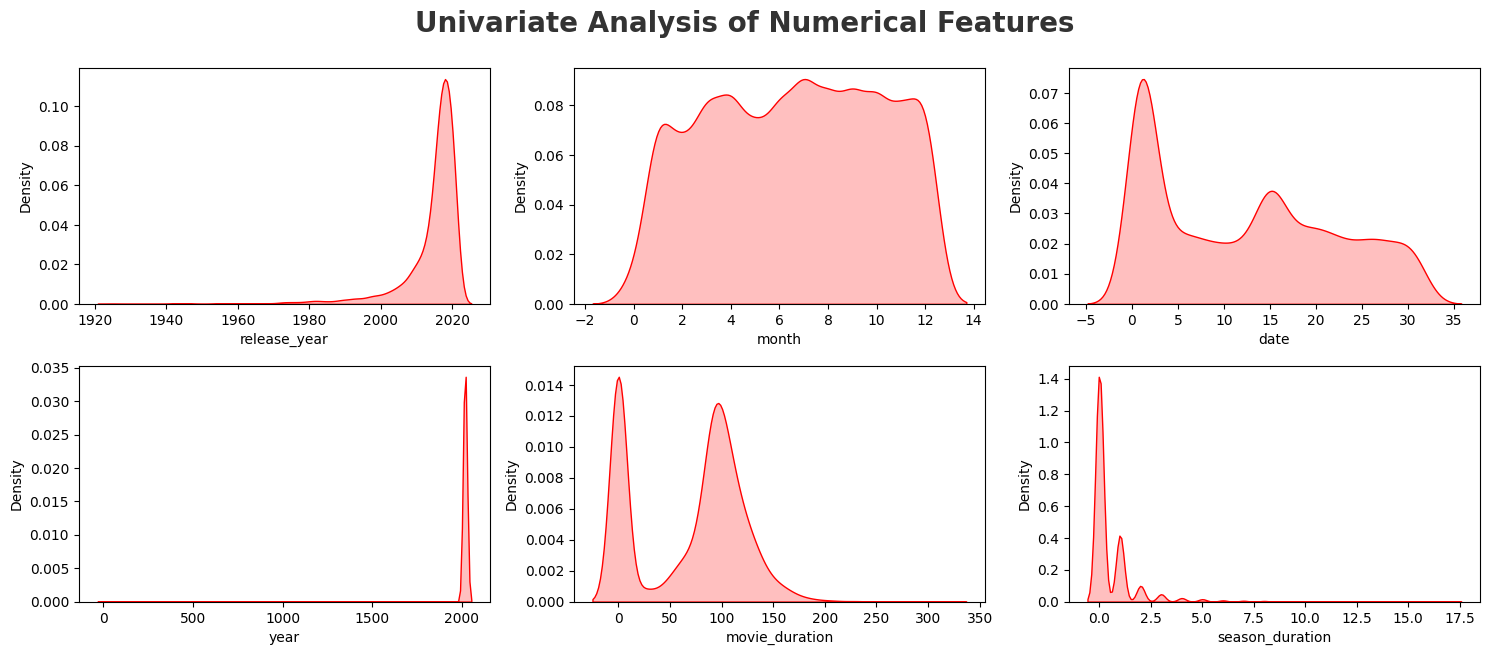

In [54]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

C:\Users\Archit Verma\AppData\Local\Temp\ipykernel_11344\3520669341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='viridis')


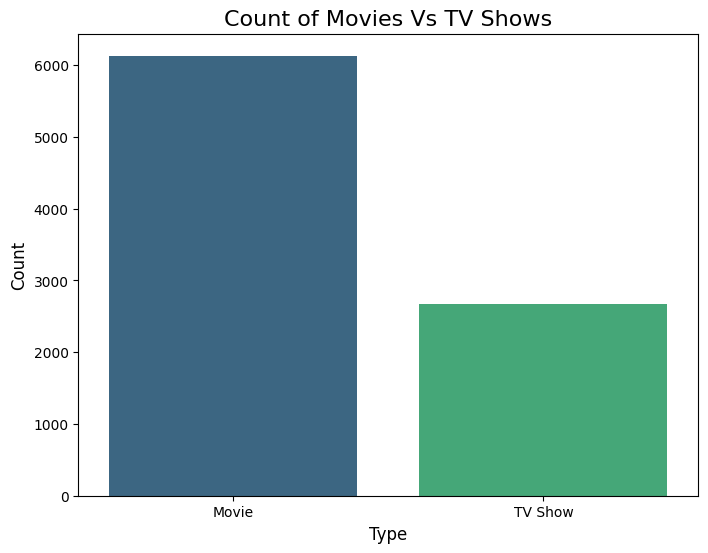

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='type',palette='viridis')
plt.title('Count of Movies Vs TV Shows',fontsize=16)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

C:\Users\Archit Verma\AppData\Local\Temp\ipykernel_11344\2419012516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values,y=top_genres.index,palette='coolwarm')


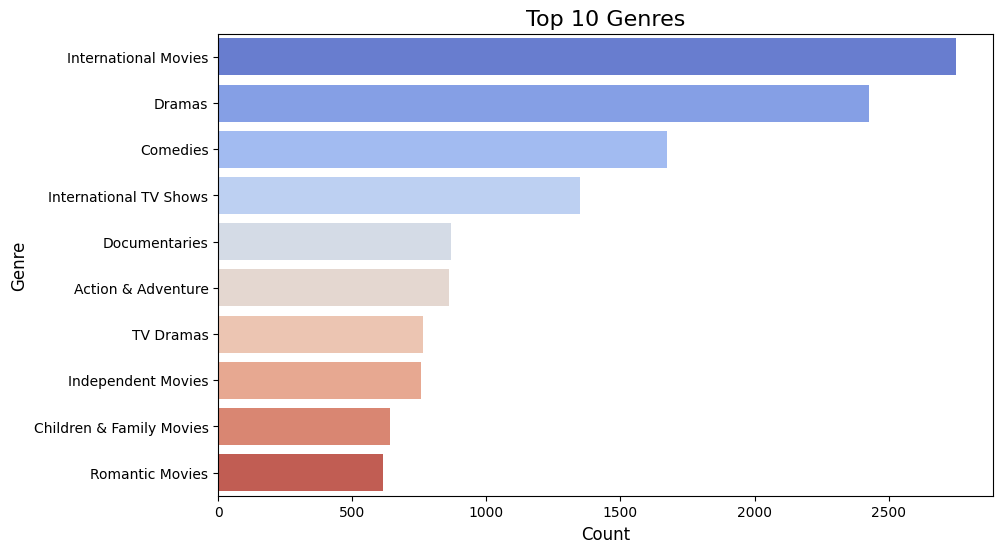

In [64]:
plt.figure(figsize=(10,6))
genres=df['listed_in'].str.split(', ').explode()
top_genres=genres.value_counts().head(10)
sns.barplot(x=top_genres.values,y=top_genres.index,palette='coolwarm')
plt.title('Top 10 Genres',fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Genre',fontsize=12)
plt.show()

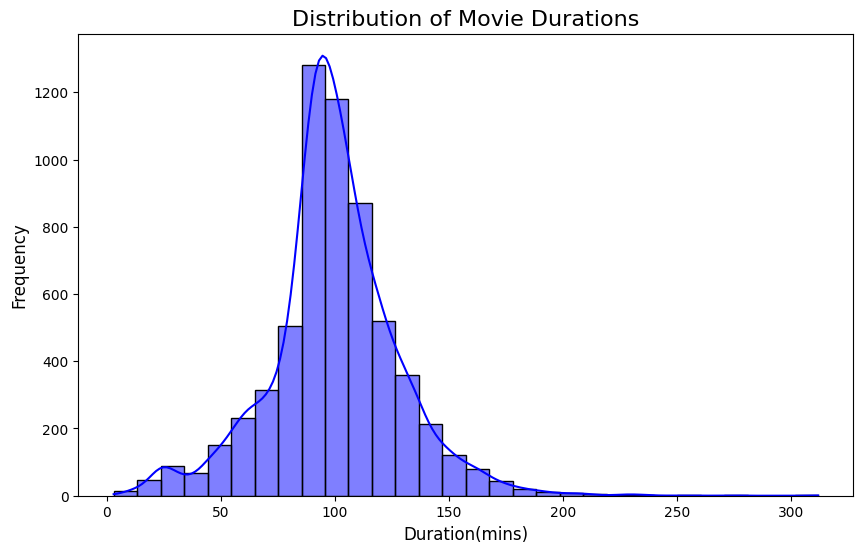

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['type']=='Movie']['movie_duration'],bins=30,kde=True,color='blue')
plt.title('Distribution of Movie Durations',fontsize=16)
plt.xlabel('Duration(mins)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

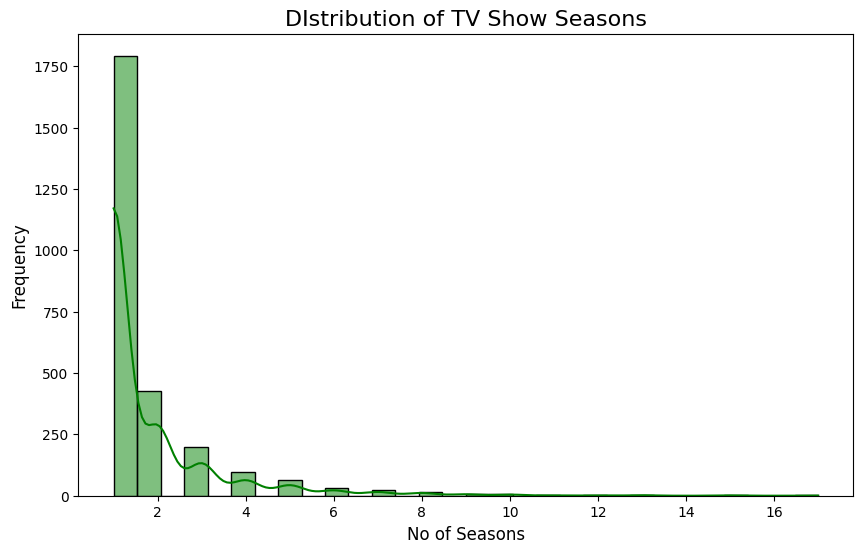

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['type']=='TV Show']['season_duration'],bins=30,kde=True,color='green')
plt.title('DIstribution of TV Show Seasons',fontsize=16)
plt.xlabel('No of Seasons',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

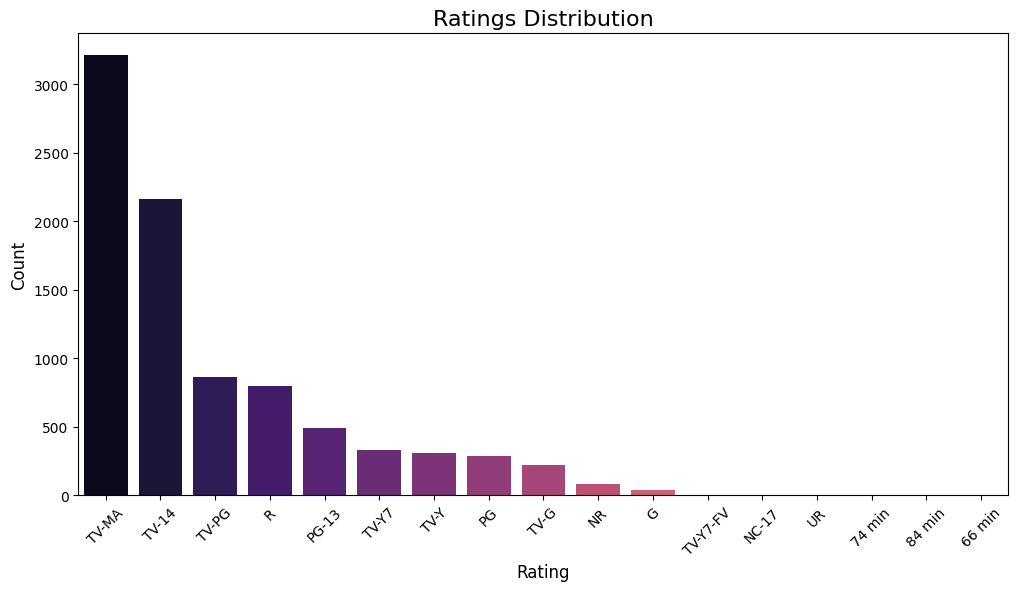

In [68]:
plt.figure(figsize=(12,6))
rating_counts=df['rating'].value_counts()
sns.barplot(x=rating_counts.index,y=rating_counts.values,palette='magma',hue=rating_counts.index,legend=False)
plt.title('Ratings Distribution',fontsize=16)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show()